In [6]:
import pybamm

In [7]:
parameters = {
    "Separator thickness [m]": 50e-6,
    "Cation transference number": 1,
    "Electrolyte conductivity [S.m-1]": 0.10,
    "Positive electrode conductivity [S.m-1]": 0.18,
    "Separator porosity": 1,
    "Positive eletrode active material volume fraction": 0.35,
    "Positive electrode porosity": 0.65,
    "Positive electrode thickness [m]": 100e-6,
    'Typical plated lithium concentration [mol.m-3]': 0,
    'Exchange-current density for plating [A.m-2]': 10,
    }
pybamm.set_logging_level("INFO")

options = {
    'working electrode': 'positive',
}
experiment = pybamm.Experiment(
    [
        (
            "Discharge at C/10 for 1 hours or until 3.5 V",
            "Rest for 0.25 hour",
            # "Charge at 1 mA until 3.505 V",
            # "Hold at 4.1 V until 50 mA",
            # "Rest for 1 hour"
            ),
    ] * 10
)
chemistry = pybamm.parameter_sets.Chen2020
params = pybamm.ParameterValues(chemistry=chemistry)
params.update(parameters, check_already_exists=False)

In [8]:
model = pybamm.lithium_ion.DFN(name='Half Cell', options=options)
solver = pybamm.CasadiSolver(atol=1e-4, rtol=1e-4, mode="fast")
sim = pybamm.Simulation(model=model, parameter_values=params,
                        solver=solver, experiment=experiment)


2022-04-14 18:46:47,510 - [INFO] base_battery_model.build_model(845): Start building Half Cell
2022-04-14 18:46:47,538 - [INFO] base_battery_model.build_model(865): Finish building Half Cell


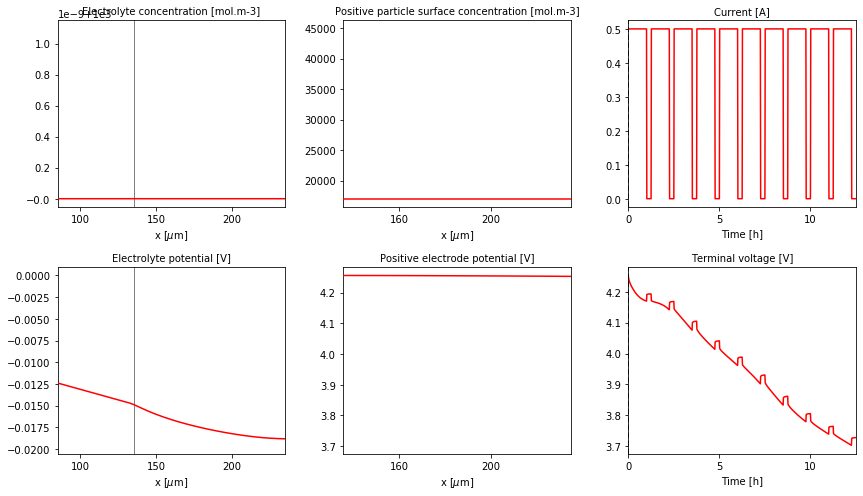

In [9]:
sim.solve()
sim.plot()

In [17]:
params.export_csv(filename="parameters.csv")

TypeError: export_csv() missing 1 required positional argument: 'self'